<a href="https://colab.research.google.com/github/AndreasTrupin/DST/blob/main/DST_Projet_E_comPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1ère étape : import des données & premier coup d'oeil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [ ]:
# Importer les données et créer nos DataFrames 
events = pd.read_csv('/content/drive/MyDrive/events.csv')
categories = pd.read_csv('/content/drive/MyDrive/category_tree.csv')
prop_1 = pd.read_csv('/content/drive/MyDrive/item_properties_part1.csv')
prop_2 = pd.read_csv('/content/drive/MyDrive/item_properties_part2.csv')
properties=pd.concat([prop_1, prop_2], axis = 0)

print('Données de events : ',' \n \n ', events.head(5), ' \n \n ','Données de categories : ',' \n \n ',  categories.head(5),' \n \n ','Données de properties : ',' \n \n ',  properties.head(5))


Données de events :   
 
         timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN  
 
  Données de categories :   
 
     categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0  
 
  Données de properties :   
 
         timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           

Transformation de timestamp en date/year/month/day/hour pour effectuer les visualisations.

In [ ]:
import datetime

# events = pd.read_csv('/content/drive/MyDrive/events.csv')

# Conversion des ms en datetime et séparation en différentes colonnes (année, mois, jour, heure)
events['date'] = pd.to_datetime(events['timestamp'],unit='ms')
events['year']=pd.to_datetime(events['date']).dt.year
events['month']=pd.to_datetime(events['date']).dt.month
events['day']=pd.to_datetime(events['date']).dt.day
events['weekday']=pd.to_datetime(events['date']).dt.day_name()
events['hour']=pd.to_datetime(events['date']).dt.time

# garder uniquement les 'heures' pour faire des tranches horaires, pas besoin des minutes
events['hour'] = events['hour'].astype('string')
events['hour'] = events['hour'].apply(lambda x: x[0:2])

# on supprimer les heures dans la date 
events['date'] = events['date'].astype('string')
events['date'] = events['date'].apply(lambda x: x[0:10])
events['date'] = pd.to_datetime(events['date'])

events

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,weekday,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02,2015,6,2,Tuesday,05
1,1433224214164,992329,view,248676,NaN,2015-06-02,2015,6,2,Tuesday,05
2,1433221999827,111016,view,318965,NaN,2015-06-02,2015,6,2,Tuesday,05
3,1433221955914,483717,view,253185,NaN,2015-06-02,2015,6,2,Tuesday,05
4,1433221337106,951259,view,367447,NaN,2015-06-02,2015,6,2,Tuesday,05
...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01,2015,8,1,Saturday,03
2756097,1438399813142,762376,view,115946,NaN,2015-08-01,2015,8,1,Saturday,03
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01,2015,8,1,Saturday,02
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01,2015,8,1,Saturday,03


# 2ème étape : premières visualisations (à rendre pour le 4 Novembre)

1. **Répartion par type d'events - Camembert**


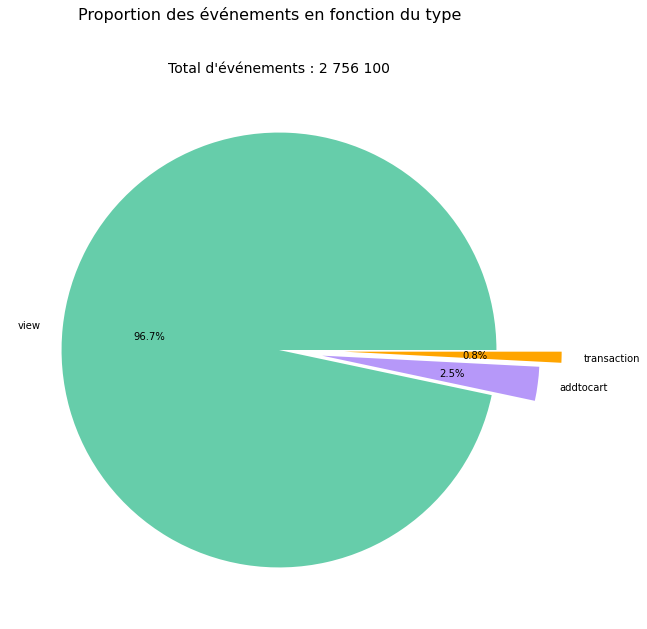

In [ ]:
from matplotlib import cm

labels = events.event.value_counts().index
values = events.event.value_counts().values

plt.figure(figsize = (10,10))
plt.pie(values, explode=(0, 0.2, 0.3)  , labels=labels, autopct='%1.1f%%', colors=['#66cdaa', '#b698f9', '#ffa500'])

plt.suptitle('Proportion des événements en fonction du type', fontsize = 16)
plt.title("Total d'événements : 2 756 100", fontsize = 14)

plt.show()


>> **Commentaires relatifs aux graphes** : 
>> Avec un premier graphique en camembert, nous voyons clairement que le nombre de visites représente la part la plus importante des événements du site, plus de 96%. Le nombre d'achats, quant à lui, représente moins d'1% des actions totales du site. 
>> Il s'agit donc d'un site de e-commerce qui est très attractif et compte beaucoup de visites mais qui a une conversion assez faible.

2.**Top 10**

Histogrammes top 10 produits vus 

*   Top 10 produits vus
*   Top 10 produits ajoutés au panier
*   Top 10 produits achetés


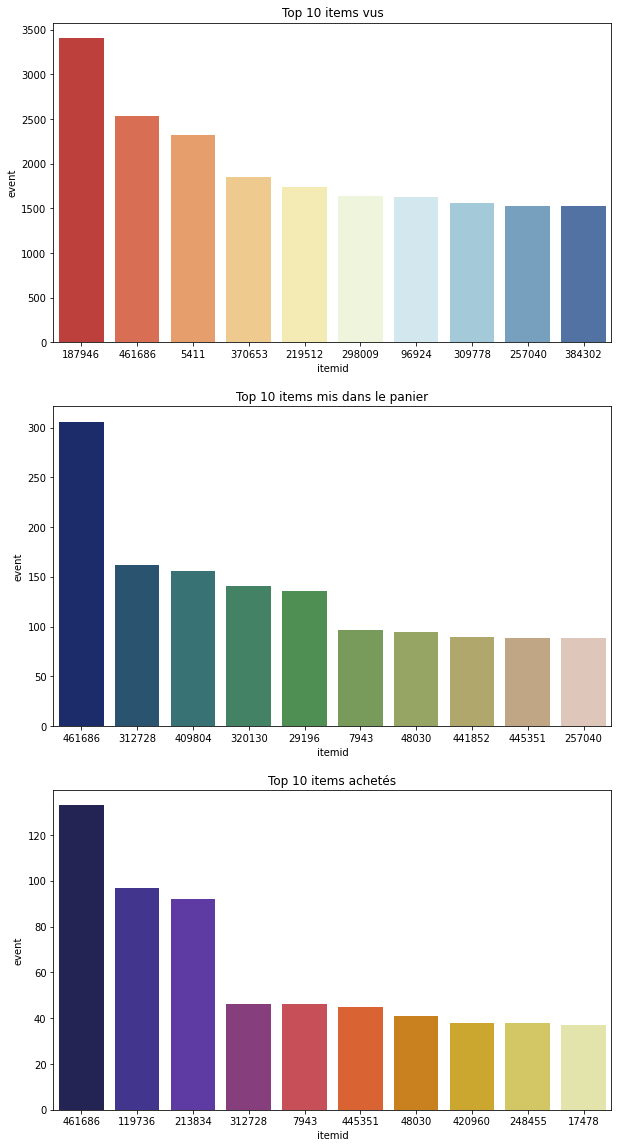

In [ ]:
# Top items
items_view = events[(events['event'] == 'view')][['itemid', 'event']].groupby("itemid").count()
items_view=items_view.sort_values(by = 'event', ascending = False)

items_add = events[(events['event'] == 'addtocart')][['itemid', 'event']].groupby("itemid").count()
items_add=items_add.sort_values(by = 'event', ascending = False)

items_transaction = events[(events['event'] == 'transaction')][['itemid', 'event']].groupby("itemid").count()
items_transaction=items_transaction.sort_values(by = 'event', ascending = False)

fig = plt.figure(figsize=(10,20))

plt.subplot(311)
plt.title('Top 10 items vus')
plt.xlabel('Items')
plt.ylabel('Nb de vues')
sns.barplot(x=items_view.index[:10] , y=items_view['event'].head(10) ,order=items_view.index[:10], palette='RdYlBu');

plt.subplot(312)
plt.title('Top 10 items mis dans le panier')
plt.xlabel('Items')
plt.ylabel('Nb de mises dans le panier')
sns.barplot(x=items_add.index[:10] , y=items_add['event'].head(10) ,order=items_add.index[:10], palette='gist_earth');

plt.subplot(313)
plt.title('Top 10 items achetés')
plt.xlabel('Items')
plt.ylabel('Nb d achats')
sns.barplot(x=items_transaction.index[:10] , y=items_transaction['event'].head(10) ,order=items_transaction.index[:10], palette='CMRmap');

>> **Commentaires relatifs aux graphiques** :
>> Sur le première graphique, on voit que le produit le plus vu n’est pas dans le top 10 des plus ajoutés au panier ou achetés. Ce produit a certainement une mauvaise conversion donc nous pourrons approfondir l’analyse sur ce produit, par la suite. Même commentaire pour les autres produits (les 3eme, 4emes ou encore 6eme produits les plus vus n'apparaissent pas dans les Top 10 suivants)

>> C'est donc le deuxième item le plus vu qui est le produit le plus ajouté au panier et également le plus acheté (item 461686). 
>> De plus, ce produit n°1 compte le double d'actions que le deucième en termes d'ajout au panier, c'est une différence importante. Nous pourrons faire une analyse plus poussée sur ce produit.

>> Le deuxième produit le plus ajouté au panier, et également le quatrième produit le plus acheté, n’est pas dans les produits les plus visités. Celui-ci est attractif car beaucoup ajouté au panier et beaucoup acheté également. C'est certainement un produit à mettre plus en avant sur le site car il a apparemment une conversion importante.

>> Les 2 et 3ème produits les plus achetés ne sont pas parmi les plus vus/mis au panier : peut être un manque de visibilité sur ces produits qui ont l’air de fonctionner à la vente. A approfondir également.


3. **Nombre d'évènements au cours du temps (9 graphes)**

* Nb de vues par mois / jour de la semaine / heure
* Nb de addtocart par mois / jour de la semaine / heure
* Nb de transactions par mois / jour de la semaine / heure

In [ ]:
# Création d'un df des événements par date / jour
events_type = events.join(pd.get_dummies(events['event'], prefix='event'))
events_date = events_type.groupby('date').agg({'event_addtocart': 'sum', 'event_transaction': 'sum', 'event_view': 'sum',}).astype('int')

events_day = events_date.reset_index()

# Création d'un df des événements par mois
events_month = events_type.groupby('month').agg({'event_addtocart': 'sum',
                                                 'event_transaction': 'sum',
                                                 'event_view': 'sum',}).astype('int')
events_month = events_month.reset_index()

# Création d'un df des événements par jour de la semaine
events_weekday = events_type.groupby('weekday').agg({'event_addtocart': 'sum',
                                                 'event_transaction': 'sum',
                                                 'event_view': 'sum',}).astype('int')
events_weekday = events_weekday.reset_index()
ordre_semaine = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
events_weekday = events_weekday.reindex(events_weekday['weekday'].map(dict(zip(ordre_semaine, range(len(ordre_semaine))))).sort_values().index)


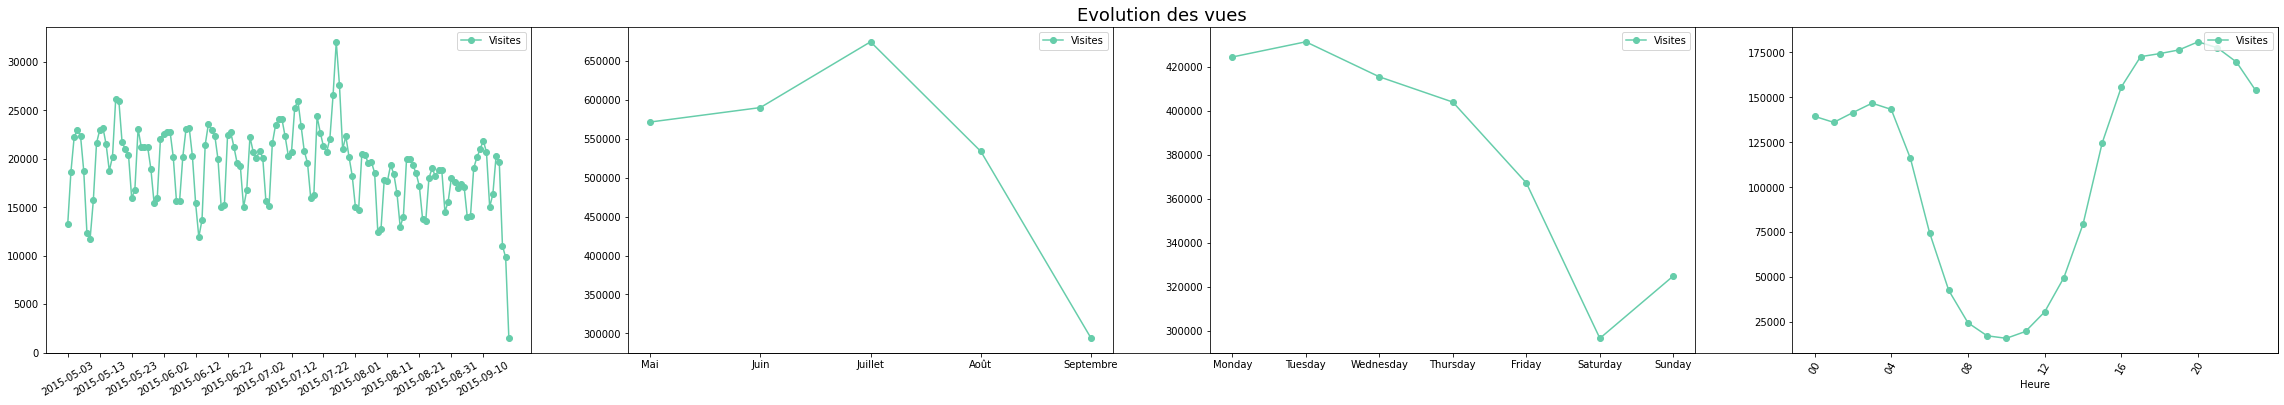

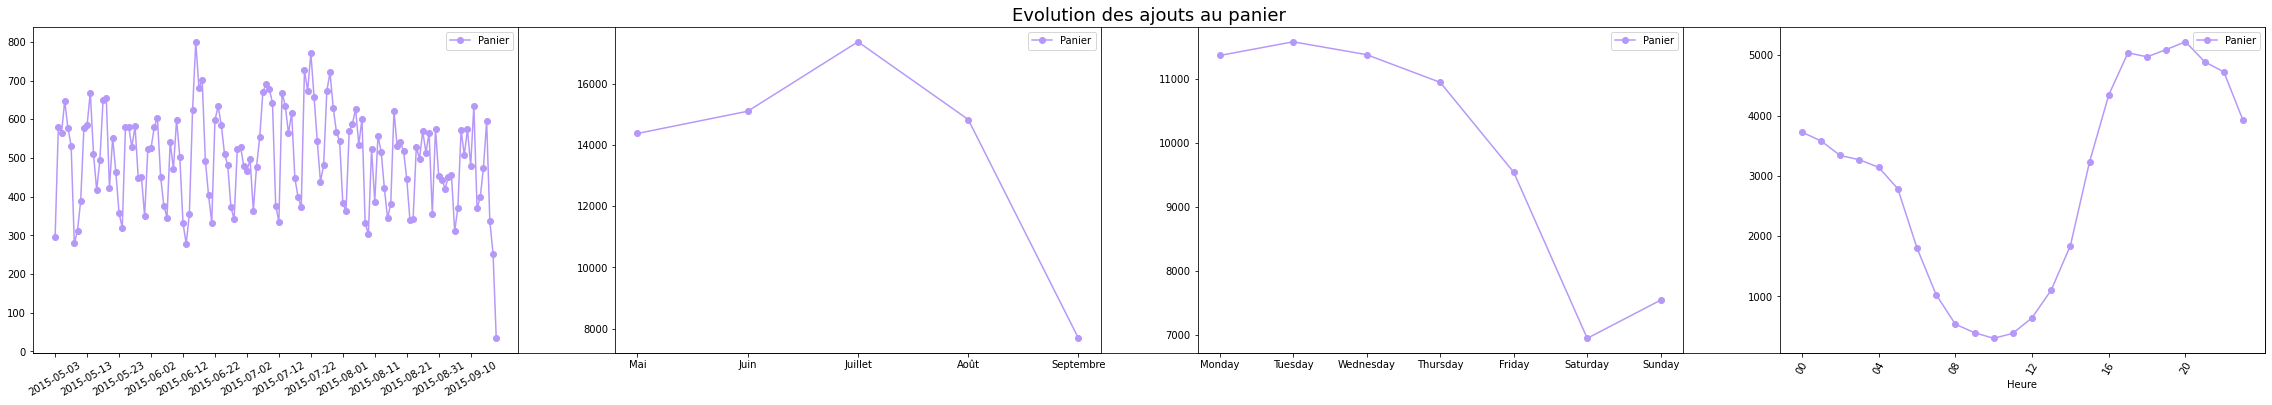

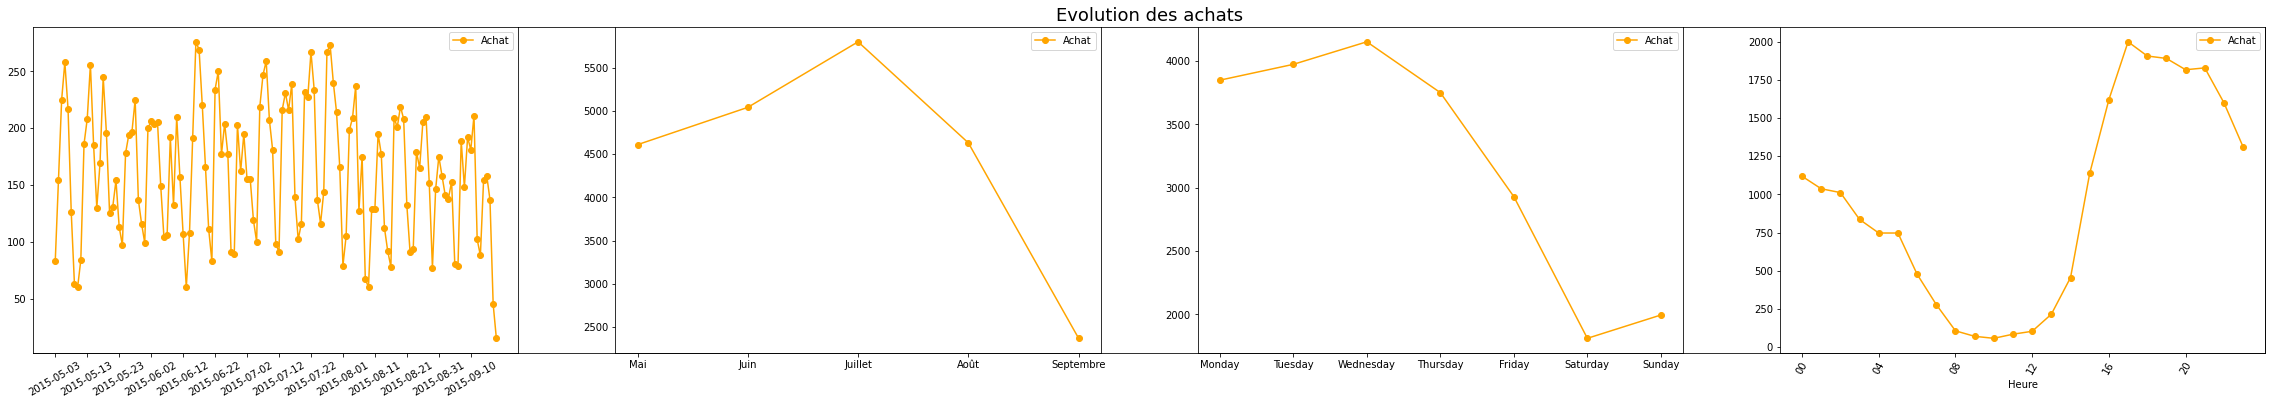

In [ ]:
# Graphs views
fig = plt.figure(figsize = (40, 6))
plt.title('Evolution des vues', fontsize=18)

plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(141)
ax1.plot_date(events_day['date'], events_day['event_view'], linestyle='-', color='#66cdaa', label='Visites')
plt.xticks(events_day['date'].iloc[::10], rotation=30)
plt.legend()

ax1 = fig.add_subplot(142)
ax1.plot_date(events_month['month'], events_month['event_view'], linestyle='-', color='#66cdaa', label='Visites')
plt.xticks(ticks= [5,6,7,8,9], labels=['Mai', 'Juin', 'Juillet', 'Août', 'Septembre'])
plt.legend()

ax1 = fig.add_subplot(143)
ax1.plot_date(events_weekday['weekday'], events_weekday['event_view'], linestyle='-', color='#66cdaa', label='Visites')
plt.legend()

ax1 = fig.add_subplot(144)
views_heure = events[events['event']=='view'].groupby('hour').event.count().to_frame().reset_index()
ax1.plot_date(views_heure['hour'], views_heure['event'], linestyle='-', color='#66cdaa', label='Visites')
plt.xticks( views_heure['hour'].iloc[::4], rotation=60);
plt.xlabel("Heure")
plt.legend(loc ="upper right")


# Graphs addtocart
fig = plt.figure(figsize = (40, 6))
plt.title('Evolution des ajouts au panier', fontsize=18)

plt.xticks([])
plt.yticks([])

ax2 = fig.add_subplot(141)
ax2.plot_date(events_day['date'], events_day['event_addtocart'], linestyle='-', color='#b698f9', label='Panier')
plt.xticks(events_day['date'].iloc[::10], rotation=30)
plt.legend()

ax2 = fig.add_subplot(142)
ax2.plot_date(events_month['month'], events_month['event_addtocart'], linestyle='-', color='#b698f9', label='Panier')
plt.xticks(ticks= [5,6,7,8,9], labels=['Mai', 'Juin', 'Juillet', 'Août', 'Septembre'])
plt.legend()

ax2 = fig.add_subplot(143)
ax2.plot_date(events_weekday['weekday'], events_weekday['event_addtocart'], linestyle='-', color='#b698f9', label='Panier')
plt.legend()

ax2 = fig.add_subplot(144)
add_heure = events[events['event']=='addtocart'].groupby('hour').event.count().to_frame().reset_index()
ax2.plot_date(add_heure['hour'], add_heure['event'], linestyle='-', color='#b698f9', label='Panier')
plt.xlabel("Heure")
plt.xticks( add_heure['hour'].iloc[::4], rotation=60);
plt.legend(loc ="upper right")


# Graphs transactions
fig = plt.figure(figsize = (40, 6))
plt.title('Evolution des achats', fontsize=18)

plt.xticks([])
plt.yticks([])

ax3 = fig.add_subplot(141)
ax3.plot_date(events_day['date'], events_day['event_transaction'], linestyle='-', color='#ffa500', label='Achat')
plt.xticks(events_day['date'].iloc[::10], rotation=30)
plt.legend()

ax3 = fig.add_subplot(142)
ax3.plot_date(events_month['month'], events_month['event_transaction'], linestyle='-', color='#ffa500', label='Achat')
plt.xticks(ticks= [5,6,7,8,9], labels=['Mai', 'Juin', 'Juillet', 'Août', 'Septembre'])
plt.legend()

ax3 = fig.add_subplot(143)
ax3.plot_date(events_weekday['weekday'], events_weekday['event_transaction'], linestyle='-', color='#ffa500', label='Achat')
plt.legend();

ax3 = fig.add_subplot(144)
transaction_heure = events[events['event']=='transaction'].groupby('hour').event.count().to_frame().reset_index()
ax3.plot_date(transaction_heure['hour'], transaction_heure['event'], linestyle='-', color='#ffa500', label='Achat')
plt.xticks( transaction_heure['hour'].iloc[::4], rotation=60);
plt.xlabel("Heure")
plt.legend();


>> **Commentaires relatifs aux graphes** : L'activité sur le site est plus forte :


*   En Juillet (ne pas prendre Septembre en compte car les données du dataset ne couvrent que quelques jours sur ce mois-ci)
*   Surtout le Lundi et Mardi, avec 25% d'activité supplémentaire par rapport au weekend
*   On pourrait peut-être penser que ce site de e-commerce est destiné à une activité plutôt B2B
*   La visualisation par heure dans la journée montre une forte activitée entre 15h et 5h du matin. On peut supposer que le site de e-commerce est très fréquentée aux U.S. plutôt qu'en Europe (le creux correspondant à 5h-12h chez nous, ce qui correspond à la nuit là-bas)




4. **Top 30 acheteurs**

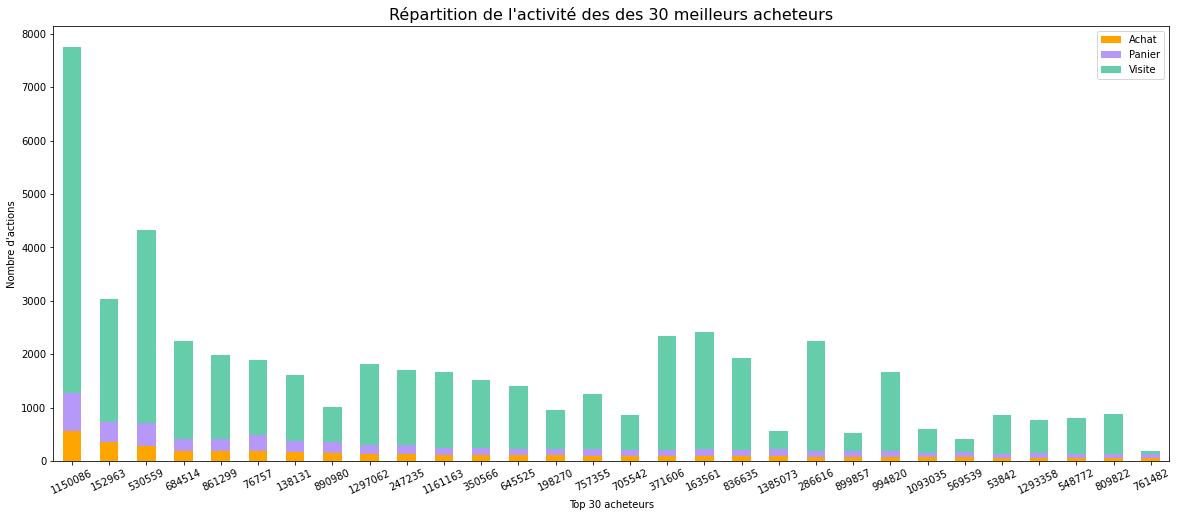

In [ ]:
# Création d'un df events + le type d'events en variables indicatrices 
# afin de pouvoir faire la somme 
events_type = events.join(pd.get_dummies(events['event'], prefix='event'))
events_type.head(10)

# Création d'un df groupé par visiteur en fonction de leur nombre total de views, addtocart, transaction
visitor_event = events_type.groupby('visitorid').agg({'event_addtocart': 'sum',
                                                      'event_transaction': 'sum',
                                                      'event_view': 'sum',}).astype('int')

# Visualisation des Top visiteurs par type d'event
top_visitor_view = visitor_event.sort_values(by='event_view', ascending=False).reset_index()
top_visitor_cart = visitor_event.sort_values(by='event_addtocart', ascending=False).reset_index()
top_visitor_trans = visitor_event.sort_values(by='event_transaction', ascending=False).reset_index()

# Création du graphique représetant le Top 30 des meilleurs acheteurs et leur activité
top_visitor_trans.head(30).plot.bar(x='visitorid',
                                    y=['event_transaction', 'event_addtocart', 'event_view'],
                                    label=['Achat','Panier','Visite'],
                                    color=['#ffa500', '#b698f9', '#66cdaa'],
                                    stacked=True,
                                    rot=25,
                                    figsize=(20, 8))

plt.title("Répartition de l'activité des des 30 meilleurs acheteurs", fontsize=16)
plt.xlabel('Top 30 acheteurs')
plt.ylabel("Nombre d'actions");

>> **Commentaires relatifs aux graphes** :
>> Cette représentation des 30 "meilleurs" acheteurs du site nous montre que:
*   l'acheteur n°1 (id: 1150086) est celui qui compte le plus de visites d'items (parmi le Top 30 des acheteurs, à vérifier versus tous les visiteurs), de loin (plus de 6000). Il compte plus de 500 achats sur ce site.
*   le nombre de visites et de mises au panier n'est pas parfaitement proportionnel au nombre d'achats, mais il est fortement lié (voir heatmap de corrélation des événements ci-dessous).
*   la proportion des événements du premier graphique correspond visuellement à la proportion des événements par visiteur pour ces 30 acheteurs.




5. **Heatmap : entre view/addtocart/transactions**



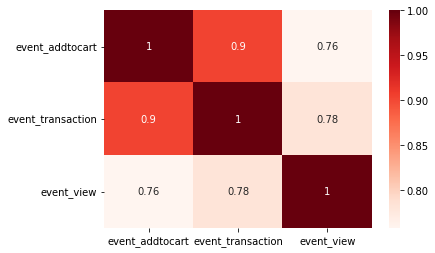

In [ ]:
import seaborn as sns

# Vérification de la relation des variables par une heatmap 
sns.heatmap(visitor_event.corr(),
            cmap='Reds',
            annot=True);


>> **Commentaires relatifs aux graphes** :
>> Cette heatmap nous montre la forte corrélation entre chaque événement:
* Plus le nombre d'ajouts au panier augmente, plus le nombre d'achats augmente avec une forte corrélation de 90%).
* Cette relation est moins forte entre les vues et les mises au panier (0.76) et/ou les achats (0.78) mais les variables restent bien corrélées.

6. **Nb de vues avant achat**


In [ ]:
events

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,weekday,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02,2015,6,2,Tuesday,05
1,1433224214164,992329,view,248676,NaN,2015-06-02,2015,6,2,Tuesday,05
2,1433221999827,111016,view,318965,NaN,2015-06-02,2015,6,2,Tuesday,05
3,1433221955914,483717,view,253185,NaN,2015-06-02,2015,6,2,Tuesday,05
4,1433221337106,951259,view,367447,NaN,2015-06-02,2015,6,2,Tuesday,05
...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01,2015,8,1,Saturday,03
2756097,1438399813142,762376,view,115946,NaN,2015-08-01,2015,8,1,Saturday,03
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01,2015,8,1,Saturday,02
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01,2015,8,1,Saturday,03


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


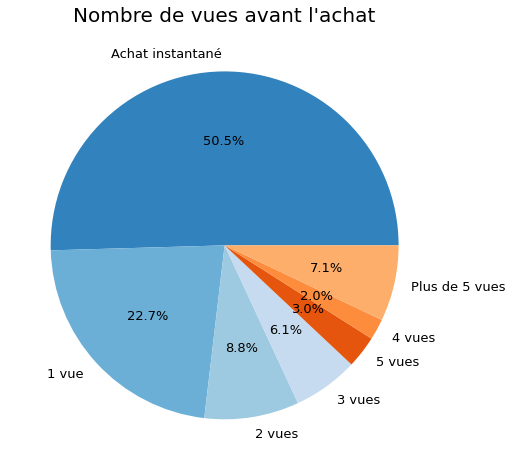

In [ ]:
import datetime
times =[]
for i in events['timestamp']:
    times.append(datetime.datetime.fromtimestamp(i//1000.0)) 

events['timestamp'] = times

# On sépare les tableaux : ceux des vus, des add, des achats
events_view=events[['visitorid','itemid','timestamp']][events['event']=='view']
events_add=events[['visitorid','itemid','timestamp']][events['event']=='addtocart']
events_trans=events[['visitorid','itemid','timestamp']][events['event']=='transaction']

# On va ne garder que les couples items/visiteurs qui ont abouti à une transaction
# On fait un merge inner pour fusionner les tableaux deux à deux
events_achats=events_trans.merge(events_add, how='inner', on=['visitorid','itemid'], suffixes=[' (transaction)', ' (add_to_cart)'])
events_achats=events_achats.merge(events_view, how='inner', on=['visitorid','itemid'])
events_achats=events_achats.rename(columns={'timestamp':'timestamp (view)'})
## Pour chaque couple item/visiteurs on a alors X lignes qui correspondent à X vues 
## Les colonnes 'timestamp transaction' & 'timestamp add_to_cart' nous indiquent quand finalement l'objet a été ajouté & acheté

df1=(events_achats['timestamp (transaction)']-events_achats['timestamp (view)'])>np.timedelta64(0)
df=events_achats[df1]

# On identifie les couples items/visiteurs où il y a eu plusieures vues 
multiple_views=df.duplicated(subset=['visitorid','itemid'], keep=False)

# On crée un tableau ne gardant que les items qui ont été vues plusieurs fois
mul_view=df[multiple_views]

# On compte toutes les lignes par couples items/visiteurs SAUF la dernière car c'est l'achat
## On identifie d'abord les lignes identiques items/visiteurs qui ne sont pas la dernère
notlast=mul_view.duplicated(subset=['visitorid','itemid'], keep='last')  
## On compte le nb de vues par couple items/visiteurs
counts_views=mul_view[notlast].groupby(['visitorid','itemid']).count()

# Compte de vue pour chaque couple item/visiteur 
nbvues_item_visitor=mul_view[notlast].groupby(['visitorid','itemid']).count()['timestamp (view)']
nbvues_item_visitor=pd.DataFrame(nbvues_item_visitor)

# On va comptabiliser le nombre fois que les items aient été vus 1 fois avant achat, 2 fois, 3 fois.....
compte_vues=pd.DataFrame(nbvues_item_visitor.value_counts(), columns=['count'])
compte_vues=compte_vues.reset_index()
compte_vues.loc[len(compte_vues)]=['0', df[~multiple_views].shape[0]]
compte_vues=compte_vues.sort_values('count', ascending=False)

# Les occurences les plus fréquentes sont : 0/1/2/3/4/5 vues avant achat
# On crée un dataframe regroupant ces 6 occurences et leur fréquence + en regroupant toutes les autres occurences dans une 
# categorie "plus de 6 vues"
moins_de_6vues=compte_vues[0:6]
plus_de_5vues=compte_vues[6::].sum().tolist()
nombre_de_vues=moins_de_6vues
nombre_de_vues.loc[6]=['plus de 5  vues', plus_de_5vues[1]]
nombre_de_vues['index']=['Achat instantané', '1 vue', '2 vues','3 vues', '5 vues', '4 vues', 'Plus de 5 vues']
nombre_de_vues=nombre_de_vues.set_index(['index'])
nombre_de_vues=nombre_de_vues.drop('timestamp (view)', axis=1)

with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20c.colors)}):
    nombre_de_vues.plot(y='count', kind='pie', autopct='%1.1f%%', figsize=(8,8),legend=False, fontsize=13)
plt.title("Nombre de vues avant l'achat", fontsize=20)
plt.ylabel('')
plt.show()


>> **Commentaires relatifs aux graphes** : 

*   La moitié des achats sur le site sont des achats instantanés. Plusieurs hypothèses pour un ratio aussi fort : 
  *  Le site de e-commerce est un site pour du B2B ou pour des habitués
  *  Les visiteurs ont déjà identifiés/repérés les produits sur d'autres plateformes 
*   22,7% des achats se font après une vue : 
  *  Les acheteurs sont assez vite fixés & convaincus d'acheter (un algorithme de recommendation est peut-être déjà présent...)

* Le reste des produits (achetés après 2 vues) représentent les 26,8% restant :
  * Hésitation entre plusieurs produits
  * Informations pas assez claires ?
  * Cela est peut-être également dû à des modifications de propriétés des produits qui finissent par convaincre les acheteurs

